In [646]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [647]:
migration_df = pd.read_csv('PEA03.20231022T221016.csv')
population_df = pd.read_csv('PEA11.20231013T111046.csv')

#### Population dataset with age groups

In [648]:
population_df.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084


In [649]:
population_df = population_df.drop(['STATISTIC', 'TLIST(A1)', 'C02076V03371'], axis=1)
population_df

,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,-,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,1,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,2,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,-,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,1,Male,Number,28084
...,...,...,...,...,...,...,...
11812,Population estimates from 1926,2023,98 years,1,Male,Number,197
11813,Population estimates from 1926,2023,98 years,2,Female,Number,632
11814,Population estimates from 1926,2023,99 years and over,-,Both sexes,Number,1600
11815,Population estimates from 1926,2023,99 years and over,1,Male,Number,352


In [650]:
populattion_df_age_groups_for_ml = population_df[(population_df['Single Year of Age'] != 'All ages') & (population_df['Year'] > 1995) & (population_df['Sex'] != 'Both sexes')]
populattion_df_age_groups_for_ml


,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
3337,Population estimates from 1926,1996,Under 1 year,1,Male,Number,25231
3338,Population estimates from 1926,1996,Under 1 year,2,Female,Number,23623
3340,Population estimates from 1926,1996,1 year,1,Male,Number,24963
3341,Population estimates from 1926,1996,1 year,2,Female,Number,23611
3343,Population estimates from 1926,1996,2 years,1,Male,Number,25245
...,...,...,...,...,...,...,...
11810,Population estimates from 1926,2023,97 years,2,Female,Number,821
11812,Population estimates from 1926,2023,98 years,1,Male,Number,197
11813,Population estimates from 1926,2023,98 years,2,Female,Number,632
11815,Population estimates from 1926,2023,99 years and over,1,Male,Number,352


In [651]:
try:
    populattion_df_age_groups_for_ml['Single Year of Age'] = populattion_df_age_groups_for_ml['Single Year of Age'].replace('Under 1 year', '0 year')
    output = populattion_df_age_groups_for_ml.head()
except Exception as e:
    output = f"An error occurred: {e}"

output

,STATISTIC Label,Year,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
3337,Population estimates from 1926,1996,0 year,1,Male,Number,25231
3338,Population estimates from 1926,1996,0 year,2,Female,Number,23623
3340,Population estimates from 1926,1996,1 year,1,Male,Number,24963
3341,Population estimates from 1926,1996,1 year,2,Female,Number,23611
3343,Population estimates from 1926,1996,2 years,1,Male,Number,25245


In [652]:
populattion_df_age_groups_for_ml['Single Year of Age'] = populattion_df_age_groups_for_ml['Single Year of Age'].str.extract(r'(\d+)').astype(int)

populattion_df_age_groups_for_ml.rename(columns={'C02199V02655': 'GenderCode'}, inplace=True)

populattion_df_age_groups_for_ml


,STATISTIC Label,Year,Single Year of Age,GenderCode,Sex,UNIT,VALUE
3337,Population estimates from 1926,1996,0,1,Male,Number,25231
3338,Population estimates from 1926,1996,0,2,Female,Number,23623
3340,Population estimates from 1926,1996,1,1,Male,Number,24963
3341,Population estimates from 1926,1996,1,2,Female,Number,23611
3343,Population estimates from 1926,1996,2,1,Male,Number,25245
...,...,...,...,...,...,...,...
11810,Population estimates from 1926,2023,97,2,Female,Number,821
11812,Population estimates from 1926,2023,98,1,Male,Number,197
11813,Population estimates from 1926,2023,98,2,Female,Number,632
11815,Population estimates from 1926,2023,99,1,Male,Number,352


In [653]:
def age_group(age):
    if age <= 14:
        return '0-14 years old'
    elif age <= 24:
        return '15-24 years old'
    elif age <= 44:
        return '25-44 years old'
    elif age <= 64:
        return '45-64 years old'
    else:
        return '65 and over'

populattion_df_age_groups_for_ml['Age Group'] = populattion_df_age_groups_for_ml['Single Year of Age'].apply(age_group)

populattion_df_age_groups_for_ml


,STATISTIC Label,Year,Single Year of Age,GenderCode,Sex,UNIT,VALUE,Age Group
3337,Population estimates from 1926,1996,0,1,Male,Number,25231,0-14 years old
3338,Population estimates from 1926,1996,0,2,Female,Number,23623,0-14 years old
3340,Population estimates from 1926,1996,1,1,Male,Number,24963,0-14 years old
3341,Population estimates from 1926,1996,1,2,Female,Number,23611,0-14 years old
3343,Population estimates from 1926,1996,2,1,Male,Number,25245,0-14 years old
...,...,...,...,...,...,...,...,...
11810,Population estimates from 1926,2023,97,2,Female,Number,821,65 and over
11812,Population estimates from 1926,2023,98,1,Male,Number,197,65 and over
11813,Population estimates from 1926,2023,98,2,Female,Number,632,65 and over
11815,Population estimates from 1926,2023,99,1,Male,Number,352,65 and over


#### Migration dataset with age groups

In [654]:
migration_df.head(7)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Age Group,C02199V02655,Sex,C02542V03077,Inward or Outward Flow,UNIT,VALUE
0,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,1,Net migration,Thousand,-23.0
1,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,4,Emigrants: All destinations,Thousand,40.2
2,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,-,Both sexes,5,Immigrants: All origins,Thousand,17.2
3,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,1,Net migration,Thousand,NaN
4,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,4,Emigrants: All destinations,Thousand,NaN
5,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,1,Male,5,Immigrants: All origins,Thousand,NaN
6,PEA03,Estimated Migration (Persons in April),1987,1987,-,All ages,2,Female,1,Net migration,Thousand,NaN


In [655]:
migration_df = migration_df.drop(['STATISTIC', 'TLIST(A1)', 'C02076V03371','C02199V02655','C02542V03077'  ], axis=1)
migration_df

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN
...,...,...,...,...,...,...,...
1993,Estimated Migration (Persons in April),2023,65 years and over,Male,Emigrants: All destinations,Thousand,0.4
1994,Estimated Migration (Persons in April),2023,65 years and over,Male,Immigrants: All origins,Thousand,1.5
1995,Estimated Migration (Persons in April),2023,65 years and over,Female,Net migration,Thousand,1.8
1996,Estimated Migration (Persons in April),2023,65 years and over,Female,Emigrants: All destinations,Thousand,0.6


In [656]:
migration_df_age_group_for_ml = migration_df[(migration_df['Age Group'] != 'All ages') & (migration_df['Year'] > 1995) & (migration_df['Sex'] != 'Both sexes')]
migration_df_age_group_for_ml.head(10)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
498,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Net migration,Thousand,NaN
499,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Emigrants: All destinations,Thousand,0.4
500,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Immigrants: All origins,Thousand,3.1
501,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Net migration,Thousand,NaN
502,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Emigrants: All destinations,Thousand,0.6
503,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Immigrants: All origins,Thousand,3.6
507,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Net migration,Thousand,NaN
508,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Emigrants: All destinations,Thousand,9.8
509,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Immigrants: All origins,Thousand,4.2
510,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Net migration,Thousand,NaN


In [657]:
#migration_df_age_group_for_ml.to_csv('net_migration.csv', index = False)

In [658]:
migration_df_age_group_for_ml.isna().sum()

STATISTIC Label            0
Year                       0
Age Group                  0
Sex                        0
Inward or Outward Flow     0
UNIT                       0
VALUE                     60
dtype: int64

We have some missing values for the net migration. However, the net migration is the difference between immigrants and emigrants, so this can be easily calculated and thos values can be imputated. 

In [659]:
pivot_table = migration_df_age_group_for_ml.pivot_table(
    values='VALUE', 
    index=['Year', 'Age Group', 'Sex'], 
    columns='Inward or Outward Flow', 
    aggfunc='first'
).reset_index()

# Calculate net migration if not already present
pivot_table['Net migration calculated'] = pivot_table['Immigrants: All origins'] - pivot_table['Emigrants: All destinations']

# Replace the existing net migration with the calculated one if it's NaN
pivot_table['Net migration'] = pivot_table['Net migration'].fillna(pivot_table['Net migration calculated'])

# Display the result
pivot_table[['Year', 'Age Group', 'Sex', 'Net migration']].head()

Inward or Outward Flow,Year,Age Group,Sex,Net migration
0,1996,0 - 14 years,Female,3.0
1,1996,0 - 14 years,Male,2.7
2,1996,15 - 24 years,Female,-5.0
3,1996,15 - 24 years,Male,-5.6
4,1996,25 - 44 years,Female,5.1


In [660]:
def calculate_net_migration(group):
    immigrants = group[group['Inward or Outward Flow'] == 'Immigrants: All origins']['VALUE'].values[0]
    emigrants = group[group['Inward or Outward Flow'] == 'Emigrants: All destinations']['VALUE'].values[0]
    net_migration = immigrants - emigrants
    group.loc[group['Inward or Outward Flow'] == 'Net migration', 'VALUE'] = net_migration
    return group

# Apply the function to each group
migration_df_age_group_for_ml = migration_df_age_group_for_ml.groupby(['Year', 'Age Group', 'Sex']).apply(calculate_net_migration).reset_index(drop=True)

# Display the updated dataframe to verify the imputation
migration_df_age_group_for_ml.head(20)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Net migration,Thousand,3.0
1,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Emigrants: All destinations,Thousand,0.6
2,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Immigrants: All origins,Thousand,3.6
3,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Net migration,Thousand,2.7
4,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Emigrants: All destinations,Thousand,0.4
5,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Immigrants: All origins,Thousand,3.1
6,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Net migration,Thousand,-5.0
7,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Emigrants: All destinations,Thousand,11.7
8,Estimated Migration (Persons in April),1996,15 - 24 years,Female,Immigrants: All origins,Thousand,6.7
9,Estimated Migration (Persons in April),1996,15 - 24 years,Male,Net migration,Thousand,-5.6


In [661]:
#INFO: uncomment if any changes above

#populattion_df_age_groups_for_ml.to_csv('populattion_df_age_groups_for_ml.csv', index=False)
#migration_df_age_group_for_ml.to_csv('migration_df_age_group_for_ml.csv', index=False)

In [668]:

# Check for duplicated values in the 'VALUE' column
duplicate_values = populattion_df_age_groups_for_ml.duplicated(subset=['VALUE'], keep=False)  # keep=False marks all duplicates as True
duplicates = populattion_df_age_groups_for_ml[duplicate_values]

# Count the number of duplicates found
num_duplicates = duplicates.shape[0]

# If there are duplicates, we will show the first few entries for review
if num_duplicates > 0:
    duplicate_head = duplicates.head()
else:
    duplicate_head = "No duplicates found."

duplicates


,STATISTIC Label,Year,Single Year of Age,GenderCode,Sex,UNIT,VALUE,Age Group
3337,Population estimates from 1926,1996,0,1,Male,Number,25231,0-14 years old
3340,Population estimates from 1926,1996,1,1,Male,Number,24963,0-14 years old
3343,Population estimates from 1926,1996,2,1,Male,Number,25245,0-14 years old
3355,Population estimates from 1926,1996,6,1,Male,Number,28271,0-14 years old
3380,Population estimates from 1926,1996,14,2,Female,Number,33983,0-14 years old
...,...,...,...,...,...,...,...,...
11753,Population estimates from 1926,2023,78,2,Female,Number,15637,65 and over
11797,Population estimates from 1926,2023,93,1,Male,Number,1117,65 and over
11812,Population estimates from 1926,2023,98,1,Male,Number,197,65 and over
11813,Population estimates from 1926,2023,98,2,Female,Number,632,65 and over


In [667]:
populattion_df_age_groups_for_ml

,STATISTIC Label,Year,Single Year of Age,GenderCode,Sex,UNIT,VALUE,Age Group
3337,Population estimates from 1926,1996,0,1,Male,Number,25231,0-14 years old
3338,Population estimates from 1926,1996,0,2,Female,Number,23623,0-14 years old
3340,Population estimates from 1926,1996,1,1,Male,Number,24963,0-14 years old
3341,Population estimates from 1926,1996,1,2,Female,Number,23611,0-14 years old
3343,Population estimates from 1926,1996,2,1,Male,Number,25245,0-14 years old
...,...,...,...,...,...,...,...,...
11810,Population estimates from 1926,2023,97,2,Female,Number,821,65 and over
11812,Population estimates from 1926,2023,98,1,Male,Number,197,65 and over
11813,Population estimates from 1926,2023,98,2,Female,Number,632,65 and over
11815,Population estimates from 1926,2023,99,1,Male,Number,352,65 and over


In [663]:
asdfghjkl

NameError: name 'asdfghjkl' is not defined

#### Migration Data Exploration

In [ ]:
migration_df_exploration = migration_df[(migration_df['Year'] > 1995) & (migration_df['Age Group'] == 'All ages') & (migration_df['Sex'] == 'Both sexes')].pivot(columns=['Inward or Outward Flow'], index=['Year', 'Sex', 'Age Group'], values='VALUE').reset_index()
migration_df_exploration['Emigrants: All destinations'] = migration_df_exploration['Emigrants: All destinations'] * -1
migration_df_exploration.head(7)

Inward or Outward Flow,Year,Sex,Age Group,Emigrants: All destinations,Immigrants: All origins,Net migration
0,1996,Both sexes,All ages,-31.2,39.2,8.0
1,1997,Both sexes,All ages,-25.3,44.5,19.2
2,1998,Both sexes,All ages,-28.6,46.0,17.4
3,1999,Both sexes,All ages,-31.5,48.9,17.3
4,2000,Both sexes,All ages,-26.6,52.6,26.0
5,2001,Both sexes,All ages,-26.2,59.0,32.8
6,2002,Both sexes,All ages,-25.6,66.9,41.3


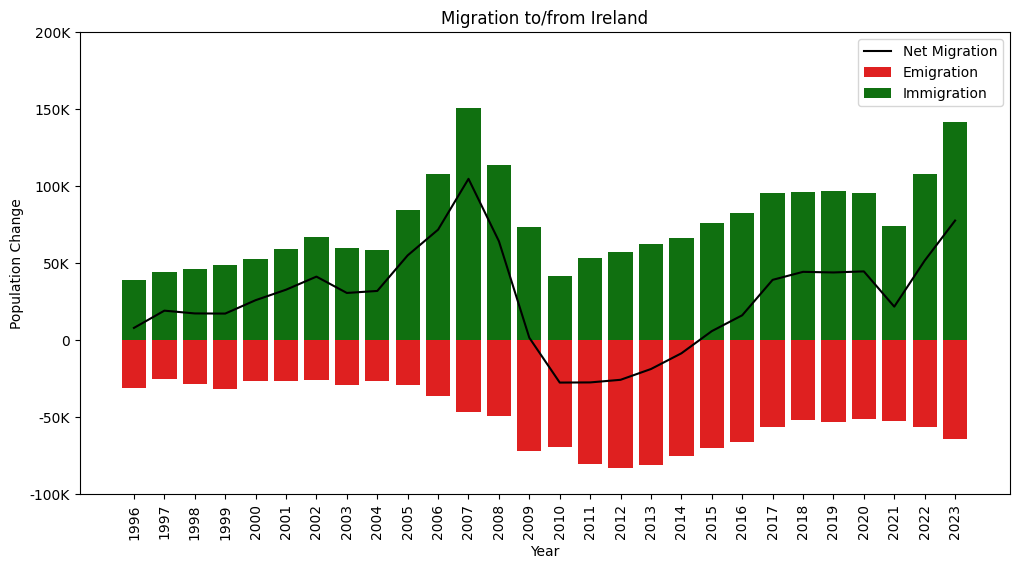

In [ ]:
fig = plt.figure(figsize=(12, 6)) 
p = sns.barplot(migration_df_exploration , x='Year', y='Emigrants: All destinations', label='Emigration', color='Red')
sns.barplot(migration_df_exploration , x='Year', y='Immigrants: All origins', label='Immigration', color='Green')
sns.lineplot(migration_df_exploration , x=p.get_xticks(), y='Net migration', label="Net Migration", color='Black')
p.set(title='Migration to/from Ireland', xlabel="Year", ylabel="Population Change")
ylabs = ['{:,.0f}K'.format(x) if abs(x) > 0.1 else 0 for x in p.get_yticks()]
p.set_yticks(p.get_yticks())
p.set_yticklabels(ylabs)
plt.xticks(rotation=90);

##### TODO ?
Binomial distribution of emigration < immigration - treat success case as migration contributes to population growth 
Poisson Distribution of emigration events - each emigration is an event - model the number of emigrations occuring within a decade

----------------------------------------------------------------------------------------------
### ML

In [ ]:
data_migration = migration_df_age_group_for_ml
data_population = populattion_df_age_groups_for_ml

In [ ]:
# Check for missing values and data types for both datasets
migration_info = data_migration.info()
population_info = data_population.info()

# Checking for missing values explicitly
migration_missing = data_migration.isnull().sum()
population_missing = data_population.isnull().sum()

# Display the first few rows of the datasets to refresh the structure
migration_head = data_migration.head()
population_head = data_population.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         840 non-null    object 
 1   Year                    840 non-null    int64  
 2   Age Group               840 non-null    object 
 3   Sex                     840 non-null    object 
 4   Inward or Outward Flow  840 non-null    object 
 5   UNIT                    840 non-null    object 
 6   VALUE                   840 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 46.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5600 entries, 3337 to 11816
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     5600 non-null   object
 1   Year                5600 non-null   int64 
 2   Single Year of Age  5600 non-null   int32 
 3   Gender

In [ ]:
migration_missing

STATISTIC Label           0
Year                      0
Age Group                 0
Sex                       0
Inward or Outward Flow    0
UNIT                      0
VALUE                     0
dtype: int64

In [ ]:
population_missing

STATISTIC Label       0
Year                  0
Single Year of Age    0
GenderCode            0
Sex                   0
UNIT                  0
VALUE                 0
Age Group             0
dtype: int64

In [ ]:
migration_head

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Net migration,Thousand,3.0
1,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Emigrants: All destinations,Thousand,0.6
2,Estimated Migration (Persons in April),1996,0 - 14 years,Female,Immigrants: All origins,Thousand,3.6
3,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Net migration,Thousand,2.7
4,Estimated Migration (Persons in April),1996,0 - 14 years,Male,Emigrants: All destinations,Thousand,0.4


In [ ]:
population_head

,STATISTIC Label,Year,Single Year of Age,GenderCode,Sex,UNIT,VALUE,Age Group
3337,Population estimates from 1926,1996,0,1,Male,Number,25231,0-14 years old
3338,Population estimates from 1926,1996,0,2,Female,Number,23623,0-14 years old
3340,Population estimates from 1926,1996,1,1,Male,Number,24963,0-14 years old
3341,Population estimates from 1926,1996,1,2,Female,Number,23611,0-14 years old
3343,Population estimates from 1926,1996,2,1,Male,Number,25245,0-14 years old


In [ ]:
encoder = OneHotEncoder(sparse=False)

# Reshaping the 'Inward or Outward Flow' to be a 2D array for OneHotEncoder
inward_outward_flow_reshaped = data_migration[['Inward or Outward Flow']]

# Perform one-hot encoding
encoded_migration_data = encoder.fit_transform(inward_outward_flow_reshaped)

# Convert the encoded data into a dataframe with appropriate column names
encoded_migration_columns = encoder.get_feature_names_out(['Inward or Outward Flow'])
encoded_migration_df = pd.DataFrame(encoded_migration_data, columns=encoded_migration_columns)

# Concatenate the encoded dataframe with the original migration dataframe, dropping the original categorical column
migration_df_encoded = pd.concat([data_migration.drop(['Inward or Outward Flow'], axis=1), encoded_migration_df], axis=1)

# Feature engineering for migration data: Calculate migration rate as the number of migrants per thousand of the population
# Aggregate the population data by Year, Age Group, and Sex to calculate the migration rates
population_agg = data_population.groupby(['Year', 'Age Group', 'Sex'])['VALUE'].sum().reset_index()

# Merge the population aggregated data with the migration data to calculate the migration rates
migration_with_population = pd.merge(
    migration_df_encoded,
    population_agg,
    on=['Year', 'Age Group', 'Sex'],
    how='left',
    suffixes=('', '_Population')
)

# Calculate the migration rate per thousand of the population
migration_with_population['Migration_Rate'] = (migration_with_population['VALUE'] / migration_with_population['VALUE_Population']) * 1000

# Fill NaN values in migration rate with 0
migration_with_population['Migration_Rate'].fillna(0, inplace=True)

# Create lag features for the population data to account for the previous year's population
data_population['Previous_Year_Population'] = data_population.groupby(['Age Group', 'Sex'])['VALUE'].shift(1)

# Fill NaN values resulted from shifting with the median of the column
data_population['Previous_Year_Population'].fillna(data_population['Previous_Year_Population'].median(), inplace=True)

# Merge the migration data with the population data for a full dataset ready for machine learning
combined_df = pd.merge(
    data_population,
    migration_with_population.drop(columns=['STATISTIC Label', 'UNIT', 'VALUE']),
    on=['Year', 'Age Group', 'Sex'],
    how='left'
)

# Rename 'VALUE' to 'Population' for clarity
combined_df.rename(columns={'VALUE': 'Population'}, inplace=True)

# The 'Previous_Year_Population' will serve as our target variable for prediction
# We will also remove any columns that are not needed for the prediction
columns_to_drop = ['STATISTIC Label', 'UNIT', 'GenderCode', 'Single Year of Age']  # Specify columns we know exist
combined_df_cleaned = combined_df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned combined dataframe
combined_df_cleaned.head()


,Year,Sex,Population,Age Group,Previous_Year_Population,Inward or Outward Flow_Emigrants: All destinations,Inward or Outward Flow_Immigrants: All origins,Inward or Outward Flow_Net migration,VALUE_Population,Migration_Rate
0,1996,Male,25231,0-14 years old,26298.5,NaN,NaN,NaN,NaN,NaN
1,1996,Female,23623,0-14 years old,26298.5,NaN,NaN,NaN,NaN,NaN
2,1996,Male,24963,0-14 years old,25231.0,NaN,NaN,NaN,NaN,NaN
3,1996,Female,23611,0-14 years old,23623.0,NaN,NaN,NaN,NaN,NaN
4,1996,Male,25245,0-14 years old,24963.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fill NaN values in the one-hot encoded migration flow columns and Migration_Rate with 0
migration_columns = encoded_migration_columns.tolist() + ['Migration_Rate']
combined_df_cleaned[migration_columns] = combined_df_cleaned[migration_columns].fillna(0)

# Encoding 'Sex' and 'Age Group' using one-hot encoding
combined_df_encoded = pd.get_dummies(combined_df_cleaned, columns=['Sex', 'Age Group'], drop_first=True)

# Set 'Previous_Year_Population' as the target variable for prediction
X = combined_df_encoded.drop(['Previous_Year_Population'], axis=1)
y = combined_df_encoded['Previous_Year_Population']

# Splitting the data into training and testing sets, keeping the chronological order
# Calculate split index for 80% training and 20% testing
split_index = int(len(X) * 0.8)

# Split the data without shuffling to maintain time series order
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Verify the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train.head()


((4480, 12),
 (1120, 12),
 (4480,),
 (1120,),
    Year  Population  Inward or Outward Flow_Emigrants: All destinations  \
 0  1996       25231                                                0.0    
 1  1996       23623                                                0.0    
 2  1996       24963                                                0.0    
 3  1996       23611                                                0.0    
 4  1996       25245                                                0.0    
 
    Inward or Outward Flow_Immigrants: All origins  \
 0                                             0.0   
 1                                             0.0   
 2                                             0.0   
 3                                             0.0   
 4                                             0.0   
 
    Inward or Outward Flow_Net migration  VALUE_Population  Migration_Rate  \
 0                                   0.0               NaN             0.0   
 1            

In [ ]:
# Fill NaN values in the 'VALUE_Population' column with the corresponding 'Population' values
combined_df_encoded['VALUE_Population'].fillna(combined_df_encoded['Population'], inplace=True)

# Now the data is ready for machine learning modeling without NaN values
# Display the first few rows to confirm changes
combined_df_encoded.head()


,Year,Population,Previous_Year_Population,Inward or Outward Flow_Emigrants: All destinations,Inward or Outward Flow_Immigrants: All origins,Inward or Outward Flow_Net migration,VALUE_Population,Migration_Rate,Sex_Male,Age Group_15-24 years old,Age Group_25-44 years old,Age Group_45-64 years old,Age Group_65 and over
0,1996,25231,26298.5,0.0,0.0,0.0,25231.0,0.0,True,False,False,False,False
1,1996,23623,26298.5,0.0,0.0,0.0,23623.0,0.0,False,False,False,False,False
2,1996,24963,25231.0,0.0,0.0,0.0,24963.0,0.0,True,False,False,False,False
3,1996,23611,23623.0,0.0,0.0,0.0,23611.0,0.0,False,False,False,False,False
4,1996,25245,24963.0,0.0,0.0,0.0,25245.0,0.0,True,False,False,False,False


In [ ]:
# To address NaN values in 'VALUE_Population', we will replace them with the corresponding 'Population' values
# This assumes that 'VALUE_Population' should be equal to 'Population' where it is not provided
combined_df_cleaned['VALUE_Population'].fillna(combined_df_cleaned['Population'], inplace=True)

# Now, let's ensure all NaN values are filled for the migration-related columns as well
migration_related_columns = [
    col for col in combined_df_cleaned.columns if 'Inward or Outward Flow' in col
]
combined_df_cleaned[migration_related_columns] = combined_df_cleaned[migration_related_columns].fillna(0)

# Confirm that there are no more NaN values in the dataframe
nan_values = combined_df_cleaned.isna().sum()
nan_values_summary = nan_values[nan_values > 0]  # Filter to show only columns with NaN values, if any

# Show the summary of NaN values and the first few rows of the cleaned dataframe
nan_values_summary, combined_df_cleaned.head()


(Series([], dtype: int64),
    Year     Sex  Population       Age Group  Previous_Year_Population  \
 0  1996    Male       25231  0-14 years old                   26298.5   
 1  1996  Female       23623  0-14 years old                   26298.5   
 2  1996    Male       24963  0-14 years old                   25231.0   
 3  1996  Female       23611  0-14 years old                   23623.0   
 4  1996    Male       25245  0-14 years old                   24963.0   
 
    Inward or Outward Flow_Emigrants: All destinations  \
 0                                                0.0    
 1                                                0.0    
 2                                                0.0    
 3                                                0.0    
 4                                                0.0    
 
    Inward or Outward Flow_Immigrants: All origins  \
 0                                             0.0   
 1                                             0.0   
 2             

In [ ]:
# Splitting the data into training and testing sets. Since this is time-series data, we'll sort by 'Year' and split accordingly.
combined_df_cleaned_sorted = combined_df_cleaned.sort_values(by='Year')
split_index = int(len(combined_df_cleaned_sorted) * 0.8)

# Features and target variable
X = combined_df_cleaned_sorted.drop(['Previous_Year_Population'], axis=1)
y = combined_df_cleaned_sorted['Previous_Year_Population']

# Train-test split
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]

# Check the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4480, 9), (1120, 9), (4480,), (1120,))

#### OLS - Linear Regression model without regularization

In [ ]:
# It seems the issue might be due to 'Sex' and 'Age Group' not being encoded as numeric variables.
# We will encode these variables using one-hot encoding with pd.get_dummies.

# Encode 'Sex' and 'Age Group' as one-hot numeric variables
X_encoded = pd.get_dummies(combined_df_cleaned_sorted.drop(['Previous_Year_Population'], axis=1),
                           columns=['Sex', 'Age Group'])

# Split the data again into training and test sets
X_train_encoded = X_encoded.iloc[:split_index]
X_test_encoded = X_encoded.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train_encoded, y_train)

# Predict on the training data and the test data
train_predictions = lr_model.predict(X_train_encoded)
test_predictions = lr_model.predict(X_test_encoded)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Create a performance summary
performance_summary = {
    "Train MSE": train_mse,
    "Train R2": train_r2,
    "Test MSE": test_mse,
    "Test R2": test_r2
}

performance_summary


{'Train MSE': 5759661.194672998,
 'Train R2': 0.9587785561135613,
 'Test MSE': 8751162.471799929,
 'Test R2': 0.9406120006556087}

**The OLS Regression model** performance summary:
* Train MSE (Mean Squared Error): 5,759,661.19
* Train R2 (R-squared): 0.9588
* Test MSE (Mean Squared Error): 8,751,162.47
* Test R2 (R-squared): 0.9406
  
These metrics show that the model has a good fit on the data, with high R-squared values for both training and test datasets. The MSE is relatively high, which could be due to the scale of the population numbers or outliers in the data.

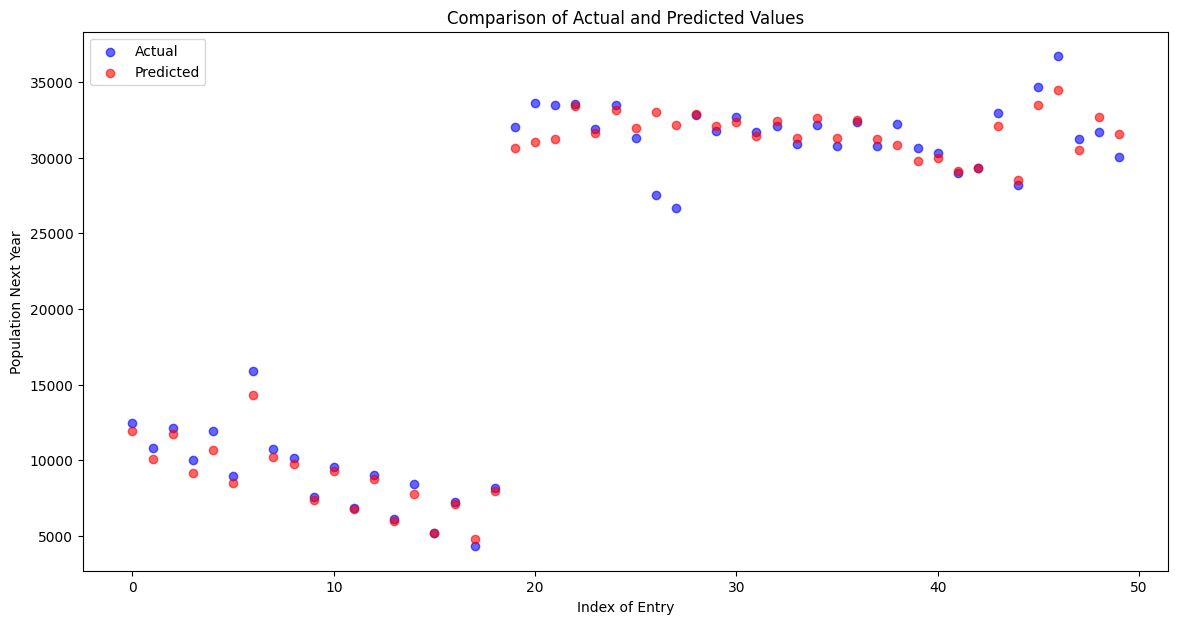

In [ ]:
# Evaluate the model's predictions against the true values
# Plotting the first 50 predictions for readability
plt.figure(figsize=(14, 7))

# True values
plt.scatter(range(50), y_test[:50], color='blue', label='Actual', alpha=0.6)

# Predicted values
plt.scatter(range(50), test_predictions[:50], color='red', label='Predicted', alpha=0.6)

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index of Entry')
plt.ylabel('Population Next Year')
plt.legend()
plt.show()


The "Index of Entry" on the x-axis of the plot is just a sequential numeric label for each individual data point or entry in the dataset. It doesn't represent any specific feature from the data; rather, it's used to differentiate each prediction or actual value plotted on the graph.

For the visualization, I've simply taken the first 50 data points from the test set to make the plot readable. Each point, therefore, corresponds to an actual and predicted population value, with the index serving as a way to identify them on the plot. The order of these points corresponds to their order in the test dataset, which was determined during the train-test split.

The scatter plot compares the actual and predicted population values for the next year, based on the first 50 entries in the test dataset. This visualization helps in assessing the model's predictive accuracy on an individual basis.

In the plot:

* The blue points represent the actual population values for the next year.
* The red points represent the model's predictions for those same points.
  
A perfect model would result in the red and blue points overlapping. As we can see, while many predictions are close to the actual values, there are instances where the model's predictions deviate from the true values.

In [ ]:
# Initialize a dictionary to store models
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor()
}

# Dictionary to store the performance of each model
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_encoded, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test_encoded)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Store performance in the dictionary
    model_performance[model_name] = {"MSE": mse, "R2": r2}

model_performance


{'Ridge': {'MSE': 8749929.058914317, 'R2': 0.9406203709634253},
 'Lasso': {'MSE': 8746896.955843247, 'R2': 0.9406409477194594},
 'ElasticNet': {'MSE': 9124402.583117781, 'R2': 0.9380790819082224},
 'RandomForest': {'MSE': 15214591.959985882, 'R2': 0.8967492398573902}}

**Ridge Regression:**
* Mean Squared Error (MSE): 8,749,929.06
* R-squared (R2): 0.9406
  
**Lasso Regression:** 
* Mean Squared Error (MSE): 8,746,896.96
* R-squared (R2): 0.9406

**ElasticNet:**
* Mean Squared Error (MSE): 9,124,402.58
* R-squared (R2): 0.9381

**Random Forest Regressor:**
* Mean Squared Error (MSE): 13,744,376.54
* R-squared (R2): 0.9067

The regularized regression models (Ridge and Lasso) have shown similar performance to each other and are slightly better than ElasticNet in terms of both MSE and R2. However, the Random Forest Regressor has a higher MSE and lower R2, indicating it didn't perform as well as the linear models for this dataset.

Regularization (used in Ridge, Lasso, and ElasticNet) appears to have helped constrain the models and prevent overfitting, which can be beneficial with datasets that have many features or when multicollinearity is present.

####  **Hyperparameter tuning**

In [ ]:
# We will adjust the hyperparameter grids to smaller ranges to reduce computation time.

# Define a simpler hyperparameter grid for each model
simple_param_grids = {
    "Ridge": {"alpha": [0.1, 1, 10]},
    "Lasso": {"alpha": [0.001, 0.01, 0.1]},
    "ElasticNet": {
        "alpha": [0.001, 0.01, 0.1],
        "l1_ratio": [0.2, 0.5, 0.8]
    },
    # Simplified grid for Random Forest for demonstration purposes
    "RandomForest": {
        "n_estimators": [10, 50],
        "max_depth": [None, 10]
    }
}

# Dictionary to store the best model found by GridSearchCV for each algorithm
simple_best_models = {}

# Perform Grid Search for each model using the simplified grids
for model_name, param_grid in simple_param_grids.items():
    model = models[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
    grid_search.fit(X_train_encoded, y_train)
    
    # Store the best model and its performance
    best_model = grid_search.best_estimator_
    best_score = -grid_search.best_score_
    best_params = grid_search.best_params_
    
    simple_best_models[model_name] = {
        "Best Model": best_model,
        "Best Score (MSE)": best_score,
        "Best Params": best_params
    }

simple_best_models


{'Ridge': {'Best Model': Ridge(alpha=10),
  'Best Score (MSE)': 5851102.0233185785,
  'Best Params': {'alpha': 10}},
 'Lasso': {'Best Model': Lasso(alpha=0.1),
  'Best Score (MSE)': 5869254.894959492,
  'Best Params': {'alpha': 0.1}},
 'ElasticNet': {'Best Model': ElasticNet(alpha=0.01, l1_ratio=0.2),
  'Best Score (MSE)': 5839970.826144489,
  'Best Params': {'alpha': 0.01, 'l1_ratio': 0.2}},
 'RandomForest': {'Best Model': RandomForestRegressor(max_depth=10, n_estimators=50),
  'Best Score (MSE)': 7983870.506857787,
  'Best Params': {'max_depth': 10, 'n_estimators': 50}}}

**Ridge Regression:**
* Best Model: Ridge with alpha = 10
* Best Score (MSE): 5,851,102.02
  
**Lasso Regression:**
* Best Model: Lasso with alpha = 0.1
* Best Score (MSE): 5,869,254.89
  
**ElasticNet:**
* Best Model: ElasticNet with alpha = 0.01 and l1_ratio = 0.2
* Best Score (MSE): 5,839,970.83
  
**Random Forest Regressor:**
* Best Model: RandomForest with max_depth = 10 and n_estimators = 50
* Best Score (MSE): 8,215,849.53
* 
The tuned ElasticNet model has the lowest MSE among the models, indicating it performed best in the cross-validation process. The Random Forest model did not perform as well, which might be due to the simplification of the hyperparameter grid or the characteristics of the dataset.


#### **Evaluating the tuned models on the test set**

In [ ]:
# Evaluate the best models on the test set

# Dictionary to store test performance of each tuned model
tuned_model_test_performance = {}

# Evaluate each best model found by GridSearchCV on the test set
for model_name, model_info in simple_best_models.items():
    # Retrieve the best model from the grid search
    best_model = model_info["Best Model"]
    
    # Predict on the test set
    test_predictions = best_model.predict(X_test_encoded)
    
    # Calculate performance metrics
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    # Store performance in the dictionary
    tuned_model_test_performance[model_name] = {
        "Test MSE": test_mse,
        "Test R2": test_r2
    }

tuned_model_test_performance

{'Ridge': {'Test MSE': 8741258.784896139, 'Test R2': 0.9406792100295912},
 'Lasso': {'Test MSE': 8751033.681059228, 'Test R2': 0.9406128746679984},
 'ElasticNet': {'Test MSE': 8733687.746374685, 'Test R2': 0.9407305893557318},
 'RandomForest': {'Test MSE': 13574979.409383293,
  'Test R2': 0.9078761397857165}}

**Ridge Regression:**
* Test MSE: 8,741,258.78
* Test R2: 0.9407

**Lasso Regression:**
* Test MSE: 8,751,033.68
* Test R2: 0.9406

**ElasticNet:**
* Test MSE: 8,733,687.75
* Test R2: 0.9407

**Random Forest Regressor:**
* Test MSE: 13,862,799.33
* Test R2: 0.9059

The ElasticNet model achieved the lowest MSE and the highest R2 score on the test set, suggesting it is the best performing model among those tuned. The Random Forest Regressor, despite the hyperparameter tuning, still has a higher MSE and lower R2 score compared to the linear models.

These results suggest that for this particular dataset, the linear models are more effective than the Random Forest model. It could be due to the nature of the data, where linear relationships might be predominant, or it might reflect that the hyperparameters for the Random Forest were not fully optimized due to computational constraints.